In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('38976_TJ-II_Mirnov_coil.TXT', sep=' ',header=None, names=('time', 'sig'))

In [3]:
a=df.loc[(df['time']>=1000) & (df['time']<=1075)] # выделяем кусок сигнала в нужном временном диапазоне

In [4]:
FD=1000/(a['time'].iloc[1]-a['time'].iloc[0])

In [5]:
spectrum = np.fft.rfft(a['sig']) #делаем фурье-спектр

In [6]:
N=len(spectrum)

In [7]:
freqs=np.fft.rfftfreq(N, 1./FD) #создаем массив частот

In [8]:
freqtocheck=float(input()) # вокруг какой частоты смотреть бикогерентность

230000


In [20]:
dotstocheck=int(input()) # сколько точек вокруг этой частоты посмотреть

100


In [21]:
k=0

In [22]:
while(freqs[k]<freqtocheck): # смотрим, в каком элементе массива находится интересующая нас частота (что-то нумпай такой возможности решил не давать)

    k+=1

In [26]:
bispectr=np.array([])
x=np.array([])
y=np.array([])
bispectrhelp=np.array([])

In [27]:
for i in range(max(k-dotstocheck, 0), min(k+dotstocheck, len(spectrum))):  #вычисляем бикогеренцию по формуле из википедии в выделенном диапазоне
    
    for j in range(max(k-dotstocheck, 0), min(k+dotstocheck, len(spectrum))):
        
        bispectrhelp=np.append(bispectrhelp, np.abs(spectrum[i]*spectrum[j]*np.conj(spectrum[i+j]))/np.abs(spectrum[i])/np.abs(spectrum[j])/np.abs(np.conj(spectrum[i+j])))

    bispectr=np.append(bispectr,bispectrhelp)
    bispectrhelp=np.array([])

In [28]:
bispectr.shape=( k+dotstocheck-max(k-dotstocheck, 0),k+dotstocheck-max(k-dotstocheck, 0)) #делаем 2-д массив для тепловой карты

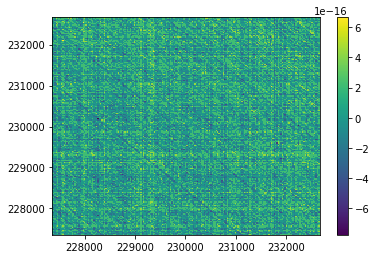

In [29]:
x=np.array(freqs[max(k-dotstocheck, 0):min(k+dotstocheck, len(spectrum)-1)])
y=np.array(freqs[max(k-dotstocheck, 0):min(k+dotstocheck, len(spectrum)-1)])

fig, axes=plt.subplots()
image=axes.pcolormesh(x, y, np.log(bispectr))
fig.colorbar(image)
